In [1]:
import pandas as pd
import numpy as np
import os.path as osp
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters


In [10]:
register_matplotlib_converters()
sns.set()

▶ All graphs should have a legend, a title, labeled x-axis and y-axis with units if applicable.  
▶ Don’t plot log of (physical) quantities. Please use log scales instead.  
Don’t leave plot randomly in the notebook without context. Please indicate question
numbers and comment on your results if necessary (especially if they are not what you
were expecting).  

Do not use seaborn.



TODO: adapt the legend with plt.legend, or put proper names during the computations.  
explain the graphs like in an article.

# Load data.

In [3]:
def load_data(dir: str) -> pd.DataFrame:
    

SyntaxError: unexpected EOF while parsing (2987206287.py, line 2)

## Load a sub-sample of the data.

In [4]:
df_q = pd.read_csv('./Data/RENA.PA/2017-01-02-RENA.PA-quotes.csv.gz', index_col = 0)

In [5]:
df_t = pd.read_csv('./Data/RENA.PA/2017-01-02-RENA.PA-trades.csv.gz', index_col = 0)

In [67]:
df_q.head()

,ts,bid price,bq1,ask price,aq1,bp2,bq2,ap2,aq2,bp3,...,bq10,ap10,aq10,mid price,weighted mid price,spread,duration,weighted spread,imbalance,mid price move
0,2017-01-02 09:01:18.813,84.19,35,84.31,38,84.18,35,84.34,50,84.16,...,55,84.44,55,84.25,84.247534,0.12,NaN,NaN,-0.041096,NaN
1,2017-01-02 09:01:18.813,84.19,35,84.31,128,84.18,35,84.34,50,84.16,...,55,84.44,55,84.25,84.215767,0.12,0.00,0.000,-0.570552,0.0
2,2017-01-02 09:01:19.893,84.19,35,84.31,193,84.18,35,84.34,50,84.16,...,55,84.44,55,84.25,84.208421,0.12,1.08,1.296,-0.692982,0.0
3,2017-01-02 09:01:20.553,84.19,35,84.31,193,84.18,35,84.34,50,84.16,...,55,84.44,55,84.25,84.208421,0.12,0.66,0.792,-0.692982,0.0
4,2017-01-02 09:01:20.553,84.19,35,84.31,193,84.18,35,84.33,53,84.16,...,55,84.42,75,84.25,84.208421,0.12,0.00,0.000,-0.692982,0.0


In [7]:
df_t.head()

,ts,price,volume
0,2017-01-02 09:01:15.893,84.31,90
1,2017-01-02 09:01:15.893,84.31,10
2,2017-01-02 09:01:18.813,84.31,12
3,2017-01-02 09:01:52.432,84.31,38
4,2017-01-02 09:01:52.452,84.31,62


# Multiple prices.   

Plot the bid price, ask price, mid price and weighted mid-price on a few
minutes of your sample.

## Compute the mid-price.

In [15]:
df_q['mid price'] = (df_q['bp1'] + df_q['ap1']) * .5

## Compute the weighted mid-price.

In [16]:
df_q['weighted mid price'] = (df_q['bp1'] * df_q['aq1'] + df_q['ap1'] * df_q['bq1']) / (df_q['bq1'] + df_q['aq1'])

In [20]:
df_q['ask price'] = df_q['ap1']
df_q['bid price'] = df_q['bp1']
#df_q = df_q.rename(columns = {'ap1': 'ask price', 'bp1': 'bid price'})

## Final plot.

<AxesSubplot: title={'center': 'Bid price and Ask price for each available observations.'}, xlabel='Available observations', ylabel='Price in Euros'>

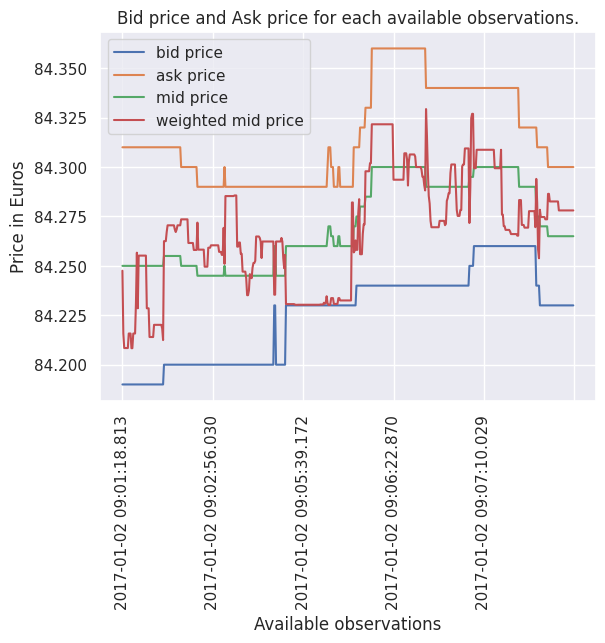

In [23]:
df_q[:500].plot(x = 'ts', 
             y = ['bid price', 'ask price', 'mid price', 'weighted mid price'], 
             kind = 'line',
             title = 'Bid price and Ask price for each available observations.',
             grid = True,
             legend = True,
             xlabel = 'Available observations',
             ylabel = 'Price in Euros',
             rot = 90,
             )

# Spread distribution.

In [24]:
df_q['spread'] = df_q['ask price'] - df_q['bid price'] 

## Plot in event time.

<AxesSubplot: title={'center': 'Empirical distribution of the spread in event time.'}, ylabel='Frequency'>

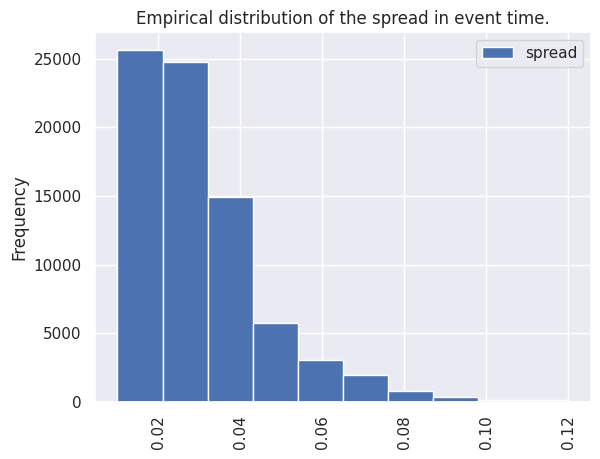

In [32]:
df_q.plot(y = ['spread'], 
             kind = 'hist',
             title = 'Empirical distribution of the spread in event time.',
             grid = True,
             legend = True,
             xlabel = 'Available observations',
             ylabel = 'Price in Euros',
             rot = 90,
             #bins = 20 #TODO change the bins.
             )

## Plot in calendar time.

In [35]:
df_q.isna().any().any()

False

In [36]:
df_q.head()

,ts,bid price,bq1,ask price,aq1,bp2,bq2,ap2,aq2,bp3,...,bq9,ap9,aq9,bp10,bq10,ap10,aq10,mid price,weighted mid price,spread
0,2017-01-02 09:01:18.813,84.19,35,84.31,38,84.18,35,84.34,50,84.16,...,700,84.42,75,84.09,55,84.44,55,84.25,84.247534,0.12
1,2017-01-02 09:01:18.813,84.19,35,84.31,128,84.18,35,84.34,50,84.16,...,700,84.42,75,84.09,55,84.44,55,84.25,84.215767,0.12
2,2017-01-02 09:01:19.893,84.19,35,84.31,193,84.18,35,84.34,50,84.16,...,700,84.42,75,84.09,55,84.44,55,84.25,84.208421,0.12
3,2017-01-02 09:01:20.553,84.19,35,84.31,193,84.18,35,84.34,50,84.16,...,700,84.42,75,84.09,55,84.44,55,84.25,84.208421,0.12
4,2017-01-02 09:01:20.553,84.19,35,84.31,193,84.18,35,84.33,53,84.16,...,700,84.41,700,84.09,55,84.42,75,84.25,84.208421,0.12


In [39]:
df_q.dtypes

ts                     object
bid price             float64
bq1                     int64
ask price             float64
aq1                     int64
bp2                   float64
bq2                     int64
ap2                   float64
aq2                     int64
bp3                   float64
bq3                     int64
ap3                   float64
aq3                     int64
bp4                   float64
bq4                     int64
ap4                   float64
aq4                     int64
bp5                   float64
bq5                     int64
ap5                   float64
aq5                     int64
bp6                   float64
bq6                     int64
ap6                   float64
aq6                     int64
bp7                   float64
bq7                     int64
ap7                   float64
aq7                     int64
bp8                   float64
bq8                     int64
ap8                   float64
aq8                     int64
bp9       

In [40]:
df_q['ts'] = pd.to_datetime(df_q['ts'])

In [44]:
df_q['duration'] = (df_q['ts'] - df_q['ts'].shift()).dt.total_seconds()

In [49]:
df_q['weighted spread'] = df_q['spread'] * df_q['duration'] * 10

<AxesSubplot: title={'center': 'Empirical distribution of the spread in event time.'}, ylabel='Frequency'>

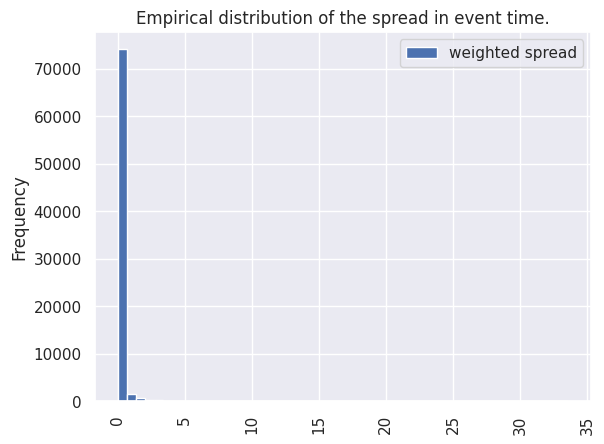

In [51]:
df_q.plot(y = ['weighted spread'], 
             kind = 'hist',
             title = 'Empirical distribution of the spread in event time.',
             grid = True,
             legend = True,
             xlabel = 'Available observations',
             ylabel = 'Price in Euros',
             rot = 90,
             bins = 50 #TODO change the bins.
             )

# Imbalance and trading activity.

## Compute the imbalance.

In [52]:
df_q['imbalance'] = (df_q['bq1'] - df_q['aq1']) / (df_q['bq1'] + df_q['aq1'])

## Compute the mid-price move each times it moves in percentage.

In [53]:
df_q['mid price move'] = df_q['mid price'].pct_change()

# Plot

<AxesSubplot: title={'center': 'Bid price and Ask price for each available observations.'}, xlabel='Available observations', ylabel='Price in Euros'>

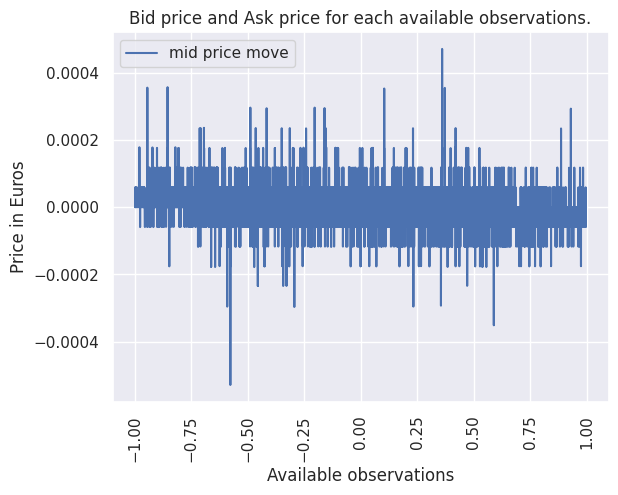

In [63]:
df_q.sort_values(by = 'imbalance', 
                 ascending=True, 
                 inplace=False, 
                 kind='heapsort').plot(x = 'imbalance', 
                                        y = ['mid price move'], 
                                        #use_index = False,
                                        kind = 'line',
                                        title = 'Mid price move as a function of the imbalance.',
                                        grid = True,
                                        legend = True,
                                        xlabel = 'Imbalance',
                                        ylabel = 'Price in Euros',
                                        rot = 90,
                                        )

# Auto correlations of the signs.

## Compute the signs using a tick test.

In [75]:
df_t.head(20)

,ts,price,volume,sign,temp sign,up,down
0,2017-01-02 09:01:15.893,84.31,90,False,False,False,False
1,2017-01-02 09:01:15.893,84.31,10,False,False,False,False
2,2017-01-02 09:01:18.813,84.31,12,False,False,False,False
3,2017-01-02 09:01:52.432,84.31,38,False,False,False,False
4,2017-01-02 09:01:52.452,84.31,62,False,False,False,False
5,2017-01-02 09:02:59.009,84.29,60,False,False,False,True
6,2017-01-02 09:02:59.009,84.29,64,False,False,False,False
7,2017-01-02 09:03:49.157,84.29,11,False,False,False,False
8,2017-01-02 09:05:11.114,84.23,1,False,False,False,True
9,2017-01-02 09:06:15.871,84.29,25,True,True,True,False


the 'up' column contains 'True' iff the price went up. The same goes for 'down'.

In [74]:
df_t['up'] = (df_t['price'].diff() > 0) 
df_t['down'] = (df_t['price'].diff() < 0) 

In [ ]:
df_t['lattest move'] =  'up' if df_t['up'] else ('down' if )

In [77]:
r = 2 if (5<4) else (5 if 3>6 else 7)
r

7

In [ ]:
def lattest_move()

In [ ]:
df_t['sign'] = df_t.apply(, axis = 1)

# Plot distribution

We have ten levels.

In [79]:
i = 3

In [83]:
(df_q['bq' + str(i)] * df_q['bp' + str(i)]).sum() / df_q['bq' + str(i)].sum()

85.15987856054726

TODO plot those bars next to each others.

## Event time.

In [ ]:
bid = [(df_q['bq' + str(i)] * df_q['bp' + str(i)]).sum() / df_q['bq' + str(i)].sum() for i in range(10)]
ask = [(df_q['aq' + str(i)] * df_q['ap' + str(i)]).sum() / df_q['aq' + str(i)].sum() for i in range(10)]

In [ ]:
df_q.plot(y = ['spread'], 
             kind = 'hist',
             title = 'Empirical distribution of the spread in event time.',
             grid = True,
             legend = True,
             xlabel = 'Available observations',
             ylabel = 'Price in Euros',
             rot = 90,
             #bins = 20 #TODO change the bins.
             )

## Calendar time.

In [ ]:
bid = [(df_q['bq' + str(i)] * df_q['bp' + str(i)] * df_q['duration'] ).sum() /( df_q['bq' + str(i)] * df_q['duration'] ).sum() for i in range(10)]
ask = [(df_q['aq' + str(i)] * df_q['ap' + str(i)] * df_q['duration'] ).sum() / (df_q['aq' + str(i)] * df_q['duration'] ).sum() for i in range(10)]

In [78]:
df_q.head(20)

,ts,bid price,bq1,ask price,aq1,bp2,bq2,ap2,aq2,bp3,...,bq10,ap10,aq10,mid price,weighted mid price,spread,duration,weighted spread,imbalance,mid price move
0,2017-01-02 09:01:18.813,84.19,35,84.31,38,84.18,35,84.34,50,84.16,...,55,84.44,55,84.25,84.247534,0.12,NaN,NaN,-0.041096,NaN
1,2017-01-02 09:01:18.813,84.19,35,84.31,128,84.18,35,84.34,50,84.16,...,55,84.44,55,84.25,84.215767,0.12,0.000,0.0000,-0.570552,0.0
2,2017-01-02 09:01:19.893,84.19,35,84.31,193,84.18,35,84.34,50,84.16,...,55,84.44,55,84.25,84.208421,0.12,1.080,1.2960,-0.692982,0.0
3,2017-01-02 09:01:20.553,84.19,35,84.31,193,84.18,35,84.34,50,84.16,...,55,84.44,55,84.25,84.208421,0.12,0.660,0.7920,-0.692982,0.0
4,2017-01-02 09:01:20.553,84.19,35,84.31,193,84.18,35,84.33,53,84.16,...,55,84.42,75,84.25,84.208421,0.12,0.000,0.0000,-0.692982,0.0
5,2017-01-02 09:01:20.553,84.19,35,84.31,193,84.18,35,84.33,53,84.16,...,55,84.42,75,84.25,84.208421,0.12,0.000,0.0000,-0.692982,0.0
6,2017-01-02 09:01:39.669,84.19,35,84.31,193,84.18,35,84.33,53,84.16,...,55,84.42,75,84.25,84.208421,0.12,19.116,22.9392,-0.692982,0.0
7,2017-01-02 09:01:39.713,84.19,35,84.31,128,84.18,35,84.33,53,84.16,...,55,84.42,75,84.25,84.215767,0.12,0.044,0.0528,-0.570552,0.0
8,2017-01-02 09:01:39.732,84.19,35,84.31,128,84.18,100,84.33,53,84.16,...,55,84.42,75,84.25,84.215767,0.12,0.019,0.0228,-0.570552,0.0
9,2017-01-02 09:01:39.732,84.19,35,84.31,128,84.18,100,84.34,50,84.16,...,55,84.44,55,84.25,84.215767,0.12,0.000,0.0000,-0.570552,0.0
